# How has Winter Storm Uri affected U.S. vaccination progress?

In [62]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [63]:
# read in data
df = pd.DataFrame(pd.read_csv('../resources/country_vaccinations.csv'))
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [64]:
# limit to USA data
usa_df = df.loc[df.iso_code == 'USA']

# convert 'date' column to datetime, set as index
usa_df.date = pd.to_datetime(usa_df.date)
usa_df = usa_df.set_index('date')

usa_df.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,country,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
date,,,,,,,,,,,,,,
2020-12-20,United States,USA,556208.0,556208.0,NaN,NaN,NaN,0.17,0.17,NaN,NaN,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
2020-12-21,United States,USA,614117.0,614117.0,NaN,57909.0,57909.0,0.18,0.18,NaN,173.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
2020-12-22,United States,USA,NaN,NaN,NaN,NaN,127432.0,NaN,NaN,NaN,381.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
2020-12-23,United States,USA,1008025.0,1008025.0,NaN,NaN,150606.0,0.30,0.30,NaN,450.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
2020-12-24,United States,USA,NaN,NaN,NaN,NaN,191001.0,NaN,NaN,NaN,571.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...


Text(2021-02-13 00:00:00, 800000, 'Winter Storm Uri')

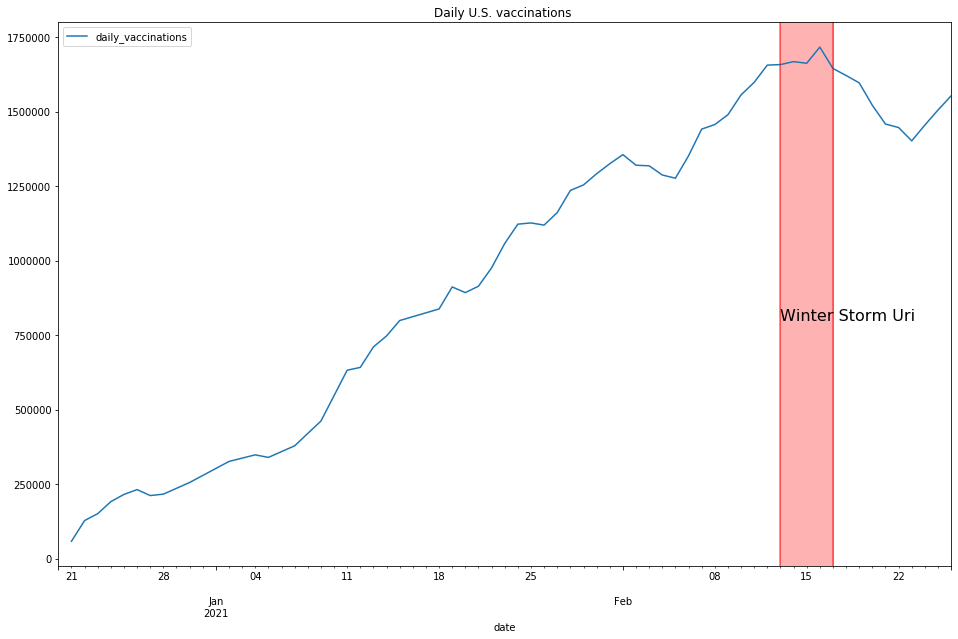

In [65]:
# plot daily vaccinations and winter storm Uri 
import datetime as dt

usa_df.daily_vaccinations.plot(legend=True, figsize=(16,10), title=('Daily U.S. vaccinations '))

storm_start = dt.datetime(2021, 2, 13)
storm_end = dt.datetime(2021, 2, 17)

plt.axvline(storm_start, alpha=.6, c='r')
plt.axvline(storm_end, alpha=.6, c='r')

plt.axvspan(storm_start, storm_end, alpha=0.3, color='red')
plt.annotate('Winter Storm Uri',xy=(storm_start, 800000), fontsize=16)

Daily vaccinations in the U.S. flatlined during Winter Storm Uri, but surprisingly, don't begin declining in ernest until Winter Storm Uri ends.

This delay could be due to infrastructure damage or canceled and rescheduled appointments. 

TODO: Look for Texas-specific data and data relating to infrastructure.